In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("Cleaned Data.xlsx")

In [3]:
df.shape

(334, 31)

In [4]:
df.iloc[0]

I am currently employed at least part-time                                           0
I identify as having a mental illness                                                0
Education                                                           High School or GED
I have my own computer separate from a smart phone                                   0
I have been hospitalized before for my mental illness                                0
How many days were you hospitalized for your mental illness                          0
I am legally disabled                                                                0
I have my regular access to the internet                                             1
I live with my parents                                                               0
I have a gap in my resume                                                            1
Total length of any gaps in my resume in months.                                    24
Annual income (including any social welfare

In [5]:
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [6]:
columns_to_drop=['Region','I have my regular access to the internet','I am currently employed at least part-time','I am on section 8 housing','I receive food stamps','Annual income from social welfare programs','I have a gap in my resume','Total length of any gaps in my resume in\xa0months.','Household Income','Device Type']


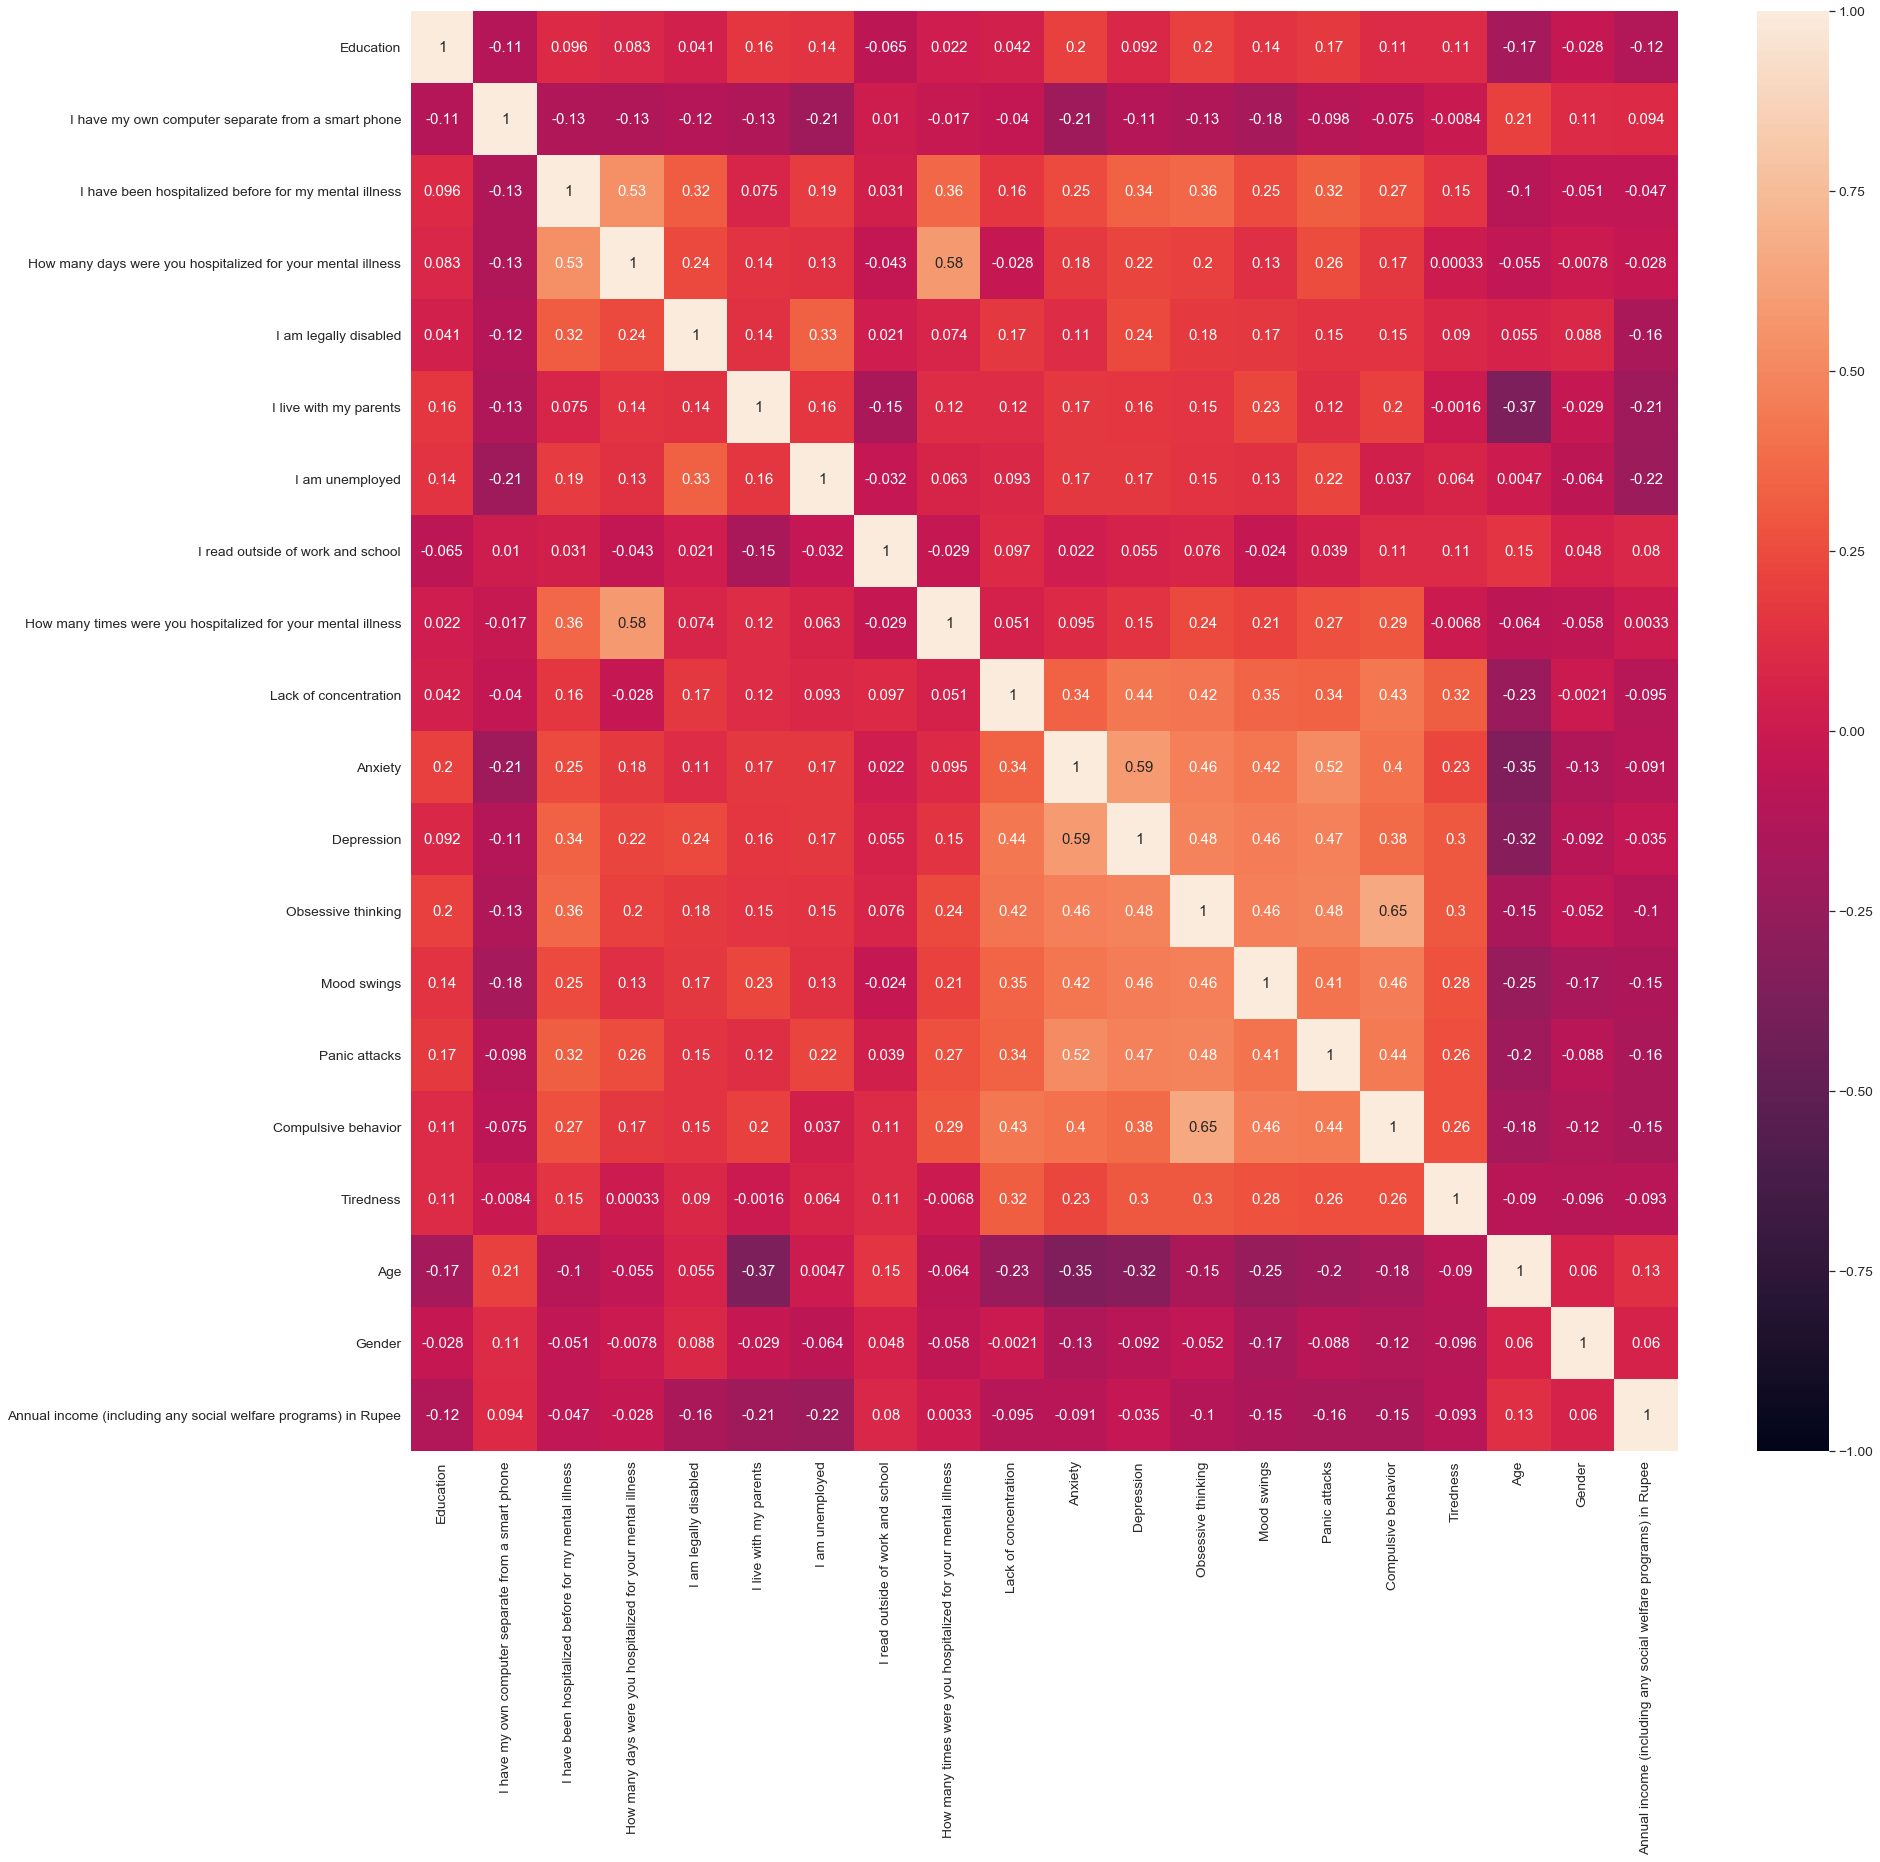

In [88]:
fig = plt.figure(figsize=(22,20))

fig.add_axes([0,0,1,1])
ax = fig.get_axes()[0]
sns.heatmap(df.corr(), ax=ax, vmin=-1, vmax=1, annot=True)
plt.savefig("correlation.jpg", bbox_inches="tight")

In [76]:
cor=df.corr().iloc[1]
cor

Education                                                        -0.110313
I have my own computer separate from a smart phone                1.000000
I have been hospitalized before for my mental illness            -0.125730
How many days were you hospitalized for your mental illness      -0.133132
I am legally disabled                                            -0.116516
I live with my parents                                           -0.125075
I am unemployed                                                  -0.210350
I read outside of work and school                                 0.009992
How many times were you hospitalized for your mental illness     -0.016522
Lack of concentration                                            -0.039837
Anxiety                                                          -0.205544
Depression                                                       -0.107092
Obsessive thinking                                               -0.128506
Mood swings              

In [8]:
df.drop(columns=columns_to_drop,inplace=True)

In [9]:
df.head().iloc[0].shape

(21,)

In [10]:
df.head(10)

,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,...,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender
0,0,High School or GED,0,0,0.0,0,0,35,1,1,...,1.0,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male
1,1,Some Phd,1,0,0.0,0,0,22,0,1,...,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male
2,0,Completed Undergraduate,1,0,0.0,0,0,100,0,1,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male
3,0,Some Undergraduate,1,0,NaN,0,1,0,1,1,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male
4,1,Completed Undergraduate,1,1,35.0,1,0,32,0,1,...,1.0,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male
5,0,High School or GED,1,0,0.0,0,1,0,0,1,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male
6,0,Some Undergraduate,1,0,0.0,0,0,1,0,1,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,18-29,Male
7,1,Some Undergraduate,1,0,0.0,0,1,11,0,1,...,1.0,1,1,0.0,0.0,1.0,1.0,1.0,18-29,Male
8,0,Completed Undergraduate,1,0,0.0,0,0,73,0,1,...,1.0,1,1,0.0,0.0,0.0,0.0,1.0,30-44,Male
9,1,Some Masters,1,0,0.0,0,0,12,0,1,...,0.0,1,1,0.0,0.0,0.0,0.0,1.0,30-44,Male


In [11]:
df.corr()

,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness
I identify as having a mental illness,1.000000,-0.125679,0.439156,0.291421,0.237348,0.137187,-0.066703,0.134788,0.041625,0.126772,0.370499,0.567467,0.712368,0.426044,0.443726,0.445889,0.403595,0.281464
I have my own computer separate from a smart phone,-0.125679,1.000000,-0.125730,-0.151312,-0.116516,-0.125075,0.094076,-0.210350,0.009992,-0.016522,-0.039372,-0.205544,-0.107092,-0.128130,-0.176590,-0.097535,-0.075143,-0.007644
I have been hospitalized before for my mental illness,0.439156,-0.125730,1.000000,0.540973,0.315741,0.075473,-0.047485,0.186704,0.031341,0.359856,0.155959,0.249252,0.340045,0.361444,0.247587,0.321463,0.267385,0.151201
How many days were you hospitalized for your mental illness,0.291421,-0.151312,0.540973,1.000000,0.246325,0.145937,-0.028609,0.141513,-0.042453,0.662266,-0.026030,0.182759,0.229210,0.213138,0.147707,0.271200,0.183054,0.001428
I am legally disabled,0.237348,-0.116516,0.315741,0.246325,1.000000,0.138883,-0.163601,0.332804,0.020962,0.073773,0.172561,0.112163,0.241015,0.183042,0.171397,0.152192,0.152252,0.097591
I live with my parents,0.137187,-0.125075,0.075473,0.145937,0.138883,1.000000,-0.214045,0.163039,-0.148967,0.116312,0.114977,0.165007,0.163039,0.153506,0.233749,0.122880,0.195804,-0.002316
Annual income (including any social welfare programs) in USD,-0.066703,0.094076,-0.047485,-0.028609,-0.163601,-0.214045,1.000000,-0.222513,0.080331,0.003276,-0.095398,-0.091315,-0.034580,-0.104028,-0.148428,-0.157585,-0.149243,-0.093690
I am unemployed,0.134788,-0.210350,0.186704,0.141513,0.332804,0.163039,-0.222513,1.000000,-0.032137,0.062755,0.091998,0.168219,0.170011,0.147834,0.133496,0.219739,0.036757,0.062480
I read outside of work and school,0.041625,0.009992,0.031341,-0.042453,0.020962,-0.148967,0.080331,-0.032137,1.000000,-0.029195,0.097288,0.022450,0.055130,0.076753,-0.023375,0.038962,0.109199,0.106545
How many times were you hospitalized for your mental illness,0.126772,-0.016522,0.359856,0.662266,0.073773,0.116312,0.003276,0.062755,-0.029195,1.000000,0.051267,0.094825,0.148104,0.238176,0.211209,0.267723,0.290379,-0.007120


In [12]:
df['Annual income (including any social welfare programs) in Rupee']=df['Annual income (including any social welfare programs) in USD']*70

In [13]:
df.head()

,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,...,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,0,High School or GED,0,0,0.0,0,0,35,1,1,...,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,2450
1,1,Some Phd,1,0,0.0,0,0,22,0,1,...,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,1540
2,0,Completed Undergraduate,1,0,0.0,0,0,100,0,1,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,7000
3,0,Some Undergraduate,1,0,NaN,0,1,0,1,1,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,0
4,1,Completed Undergraduate,1,1,35.0,1,0,32,0,1,...,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,2240


In [14]:
df.drop('Annual income (including any social welfare programs) in USD',axis=1,inplace=True)

In [15]:
df.head(20)

,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,...,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,0,High School or GED,0,0,0.0,0,0,1,1,0,...,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,2450
1,1,Some Phd,1,0,0.0,0,0,0,1,0,...,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,1540
2,0,Completed Undergraduate,1,0,0.0,0,0,0,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,7000
3,0,Some Undergraduate,1,0,NaN,0,1,1,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,0
4,1,Completed Undergraduate,1,1,35.0,1,0,0,1,4,...,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,2240
5,0,High School or GED,1,0,0.0,0,1,0,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,0
6,0,Some Undergraduate,1,0,0.0,0,0,0,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,18-29,Male,70
7,1,Some Undergraduate,1,0,0.0,0,1,0,1,0,...,1,1,0.0,0.0,1.0,1.0,1.0,18-29,Male,770
8,0,Completed Undergraduate,1,0,0.0,0,0,0,1,0,...,1,1,0.0,0.0,0.0,0.0,1.0,30-44,Male,5110
9,1,Some Masters,1,0,0.0,0,0,0,1,0,...,1,1,0.0,0.0,0.0,0.0,1.0,30-44,Male,840


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 21 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   I identify as having a mental illness                           334 non-null    int64  
 1   Education                                                       334 non-null    object 
 2   I have my own computer separate from a smart phone              334 non-null    int64  
 3   I have been hospitalized before for my mental illness           334 non-null    int64  
 4   How many days were you hospitalized for your mental illness     297 non-null    float64
 5   I am legally disabled                                           334 non-null    int64  
 6   I live with my parents                                          334 non-null    int64  
 7   I am unemployed                                      

In [17]:
df['How many days were you hospitalized for your mental illness'].fillna(df['How many days were you hospitalized for your mental illness'].median(),inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 21 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   I identify as having a mental illness                           334 non-null    int64  
 1   Education                                                       334 non-null    object 
 2   I have my own computer separate from a smart phone              334 non-null    int64  
 3   I have been hospitalized before for my mental illness           334 non-null    int64  
 4   How many days were you hospitalized for your mental illness     334 non-null    float64
 5   I am legally disabled                                           334 non-null    int64  
 6   I live with my parents                                          334 non-null    int64  
 7   I am unemployed                                      

In [19]:
for i in df:
    if i=='Education' or i=='Age' or i=='Gender':
        df[i].dropna()
    else:
        df[i].fillna(df[i].median(),inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 21 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   I identify as having a mental illness                           334 non-null    int64  
 1   Education                                                       334 non-null    object 
 2   I have my own computer separate from a smart phone              334 non-null    int64  
 3   I have been hospitalized before for my mental illness           334 non-null    int64  
 4   How many days were you hospitalized for your mental illness     334 non-null    float64
 5   I am legally disabled                                           334 non-null    int64  
 6   I live with my parents                                          334 non-null    int64  
 7   I am unemployed                                      

In [21]:
y=df['I identify as having a mental illness']

In [22]:
df.drop('I identify as having a mental illness',axis=1,inplace=True)

In [23]:
df.head()

,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,High School or GED,0,0,0.0,0,0,1,1,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,2450
1,Some Phd,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,1540
2,Completed Undergraduate,1,0,0.0,0,0,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,7000
3,Some Undergraduate,1,0,0.0,0,1,1,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,0
4,Completed Undergraduate,1,1,35.0,1,0,0,1,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,2240


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le_educatio=LabelEncoder()
le_age=LabelEncoder()
le_gender=LabelEncoder()

In [26]:
df['Education']=le_educatio.fit_transform(df['Education'])

In [27]:
df.head()

,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,3,0,0,0.0,0,0,1,1,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,2450
1,4,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,1540
2,2,1,0,0.0,0,0,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,7000
3,5,1,0,0.0,0,1,1,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,0
4,2,1,1,35.0,1,0,0,1,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,2240


In [28]:
df['Age']=le_age.fit_transform(df['Age'])
df['Gender']=le_gender.fit_transform(df['Gender'])

In [29]:
df.head()

,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,3,0,0,0.0,0,0,1,1,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,1,1,2450
1,4,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,0,1,1540
2,2,1,0,0.0,0,0,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,1,7000
3,5,1,0,0.0,0,1,1,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,1,0
4,2,1,1,35.0,1,0,0,1,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,1,1,2240


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss=StandardScaler()

In [32]:
df2=ss.fit_transform(df)

In [33]:
df2.shape

(334, 20)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(267, 20)

In [37]:
y_train.shape

(267,)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr=LogisticRegression()

In [40]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred=lr.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cf_matrix=confusion_matrix(y_test,y_pred)

In [44]:
import matplotlib.pyplot as plt

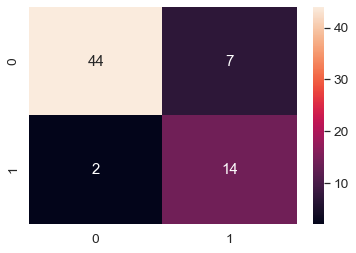

In [89]:
sns.heatmap(cf_matrix, annot=True)
plt.savefig("confusion_matrix.jpg", bbox_inches="tight")

In [46]:
from sklearn.metrics import precision_score,recall_score

In [47]:
precision_score(y_test,y_pred)

0.6666666666666666

In [48]:
recall_score(y_test,y_pred)

0.875

In [49]:
y_test=y_test.values

In [50]:
s=0
for i in range(y_test.shape[0]):
    if y_pred[i]==y_test[i]:
        s+=1
print(s/y_pred.shape[0])

0.8656716417910447


In [51]:
for i in df:
    print(i)

Education
I have my own computer separate from a smart phone
I have been hospitalized before for my mental illness
How many days were you hospitalized for your mental illness
I am legally disabled
I live with my parents
I am unemployed
I read outside of work and school
How many times were you hospitalized for your mental illness
Lack of concentration
Anxiety
Depression
Obsessive thinking
Mood swings
Panic attacks
Compulsive behavior
Tiredness
Age
Gender
Annual income (including any social welfare programs) in Rupee


In [52]:
df.head(10)

,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I live with my parents,I am unemployed,I read outside of work and school,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Annual income (including any social welfare programs) in Rupee
0,3,0,0,0.0,0,0,1,1,0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,1,1,2450
1,4,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,0,1,1540
2,2,1,0,0.0,0,0,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,1,7000
3,5,1,0,0.0,0,1,1,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,1,0
4,2,1,1,35.0,1,0,0,1,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,1,1,2240
5,3,1,0,0.0,0,1,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,1,0
6,5,1,0,0.0,0,0,0,1,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,1,70
7,5,1,0,0.0,0,1,0,1,0,1.0,1,1,0.0,0.0,1.0,1.0,1.0,0,1,770
8,2,1,0,0.0,0,0,0,1,0,1.0,1,1,0.0,0.0,0.0,0.0,1.0,1,1,5110
9,7,1,0,0.0,0,0,0,1,0,0.0,1,1,0.0,0.0,0.0,0.0,1.0,1,1,840


In [53]:
le_age.transform(['30-44'])

array([1], dtype=int64)

In [54]:
from sklearn.metrics import f1_score

In [55]:
f1_score(y_test,y_pred)

0.7567567567567567

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt=DecisionTreeClassifier()

In [58]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
y_pred2=dt.predict(X_test)

In [60]:
y_pred2

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0], dtype=int64)

In [61]:
s=0
for i in range(y_test.shape[0]):
    if y_pred2[i]==y_test[i]:
        s+=1
print(s/y_pred.shape[0])

0.835820895522388


In [63]:
precision_score(y_pred2,y_test)

0.8125

In [65]:
recall_score(y_pred2,y_test)

0.6190476190476191

In [66]:
import pickle

In [67]:
filename = 'model.sav'
pickle.dump(lr, open(filename, 'wb'))

In [68]:
X_test[0]

array([-1.55707728,  0.37925666, -0.2905436 , -0.21841317, -0.33111109,
       -0.35295768, -0.58887536,  0.35295768, -0.14742695, -0.42451386,
       -0.65372045, -0.58887536, -0.37925666, -0.35829929, -0.41464421,
       -0.30835364, -0.65372045, -0.61183454,  1.055426  , -1.05944999])

In [69]:
filename = 'Standart_scale.sav'
pickle.dump(ss, open(filename, 'wb'))

In [71]:
filename1='education_labelencoder.sav'
filename2='age_labelencoder.sav'
filename3='gender_labelencoder.sav'

In [72]:
pickle.dump(le_educatio, open(filename1, 'wb'))

In [73]:
pickle.dump(le_age, open(filename2, 'wb'))

In [74]:
pickle.dump(le_gender, open(filename3, 'wb'))